<a href="https://colab.research.google.com/github/bioproj/code/blob/master/computational_biology/computational_biology_count_distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
sample_szie=3
gene_mean = np.array([10,30,50,60]).reshape(-1,1)
gene_mean
matrix = np.random.randint(
    low=gene_mean-2,
    high=gene_mean+2,
    size=(4, 3)
)
matrix
df = pd.DataFrame(matrix, index=["gene_1","gene_2","gene_3","gene_4"], columns=["sample_1","sample_2","sample_3"])
df

,sample_1,sample_2,sample_3
gene_1,9,10,10
gene_2,28,28,30
gene_3,51,50,51
gene_4,61,58,60


In [ ]:
df.sum()

,0
sample_1,149
sample_2,146
sample_3,151


# -
$X_{ij}$ count of gene $i$(i=1,...,m) in sample $j$(1,..,n), n is the number of replicates in one condition.

$X_{i1},...,X_{ij} \sim $ Count Distribution




## Multinomial Distribution
> Binomial Distribution:  the number of successes in a sequence of n independent experiments

$X_{11},X_{21},X_{31} \sim B(149,p)$


\begin{align}
(X_{1j},...,X_{mj})
& \sim Multinomial(N_{j},(p_{1},..,p_{m})) \\
N_{j}
&= \sum_{m}^{i=1}X_{ij} \\
\sum_{m}^{i=1}p_{i}
&=1
\end{align}


## Poisson  Distribution

when $N_{j} \rightarrow  \infty, p_{1},...p_{m}\rightarrow 0$
\begin{align}
\underbrace{X_{ij} \sim Poi(N_{j}.p_{1}),...,X_{ij} \sim Poi(N_{j}.p_{m})}_{\text{independent}}
\end{align}
$X_{i1},...,X_{ij}$ is independent and identically distributed.


Probability mass function


\begin{align}
  f(k;\lambda) = Pr(X=k)=\frac{\lambda^{k} e^{-\lambda}}{k!}
\end{align}

## Negative Binomial Distribution
Gamma-Poisson hierarchical model

\begin{align}
\lambda_{ij}
&
\sim Gamma(\alpha_{i}, \beta_{i}) \\
X_{ij}
&
\sim Pio(\lambda_{ij})  
&& vs
&& X_{ij} \sim Poi(\lambda_{i}) \\
&
\end{align}

$X_{ij} \sim NB(\mu,\phi)$

In [ ]:
sample_szie=3
gene_mean = np.array([10,30,50,60]).reshape(-1,1)
gene_mean
matrix = np.random.poisson(
    lam=gene_mean,
    size=(4, 3)
)
matrix
df = pd.DataFrame(matrix, index=["gene_1","gene_2","gene_3","gene_4"], columns=["sample_1","sample_2","sample_3"])
df

,sample_1,sample_2,sample_3
gene_1,8,9,8
gene_2,29,39,35
gene_3,49,39,50
gene_4,49,60,55


In [ ]:
# https://hbctraining.github.io/DGE_workshop/lessons/01_DGE_setup_and_overview.html
!wget https://raw.githubusercontent.com/hbc/NGS_Data_Analysis_Course/master/sessionIII/data/Mov10_full_counts.txt

--2025-01-13 14:33:15--  https://raw.githubusercontent.com/hbc/NGS_Data_Analysis_Course/master/sessionIII/data/Mov10_full_counts.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 799832 (781K) [text/plain]
Saving to: ‘Mov10_full_counts.txt’

Mov10_full_counts.t 100%[===================>] 781.09K  --.-KB/s    in 0.008s  

2025-01-13 14:33:15 (92.5 MB/s) - ‘Mov10_full_counts.txt’ saved [799832/799832]



In [ ]:
count = pd.read_csv("Mov10_full_counts.txt",sep="\t")

In [ ]:
count.shape

(23368, 9)

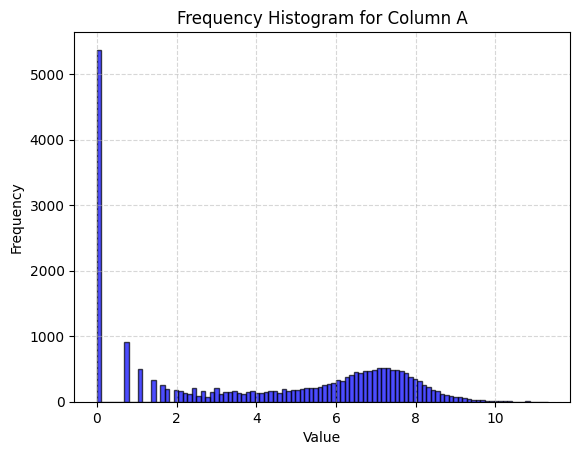

In [ ]:
import matplotlib.pyplot as plt
np.log1p(count['Mov10_oe_1']).plot.hist(bins=100, alpha=0.7, color='blue', edgecolor='black', title='Frequency Histogram for Column A')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(alpha=0.5, linestyle='--')
plt.show()

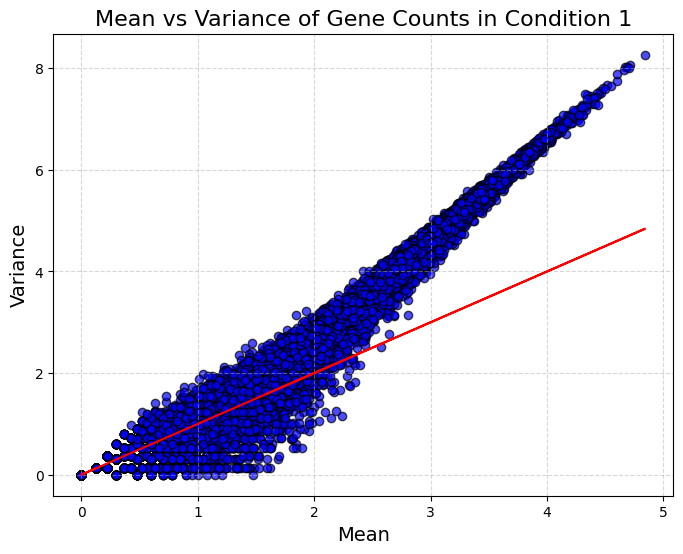

In [ ]:

count
df = count.iloc[:,6:10]
df

means = np.log10(df.mean(axis=1)+1)
variances = np.log10(df.var(axis=1)+1)
means

plt.figure(figsize=(8, 6))
plt.scatter(means, variances, color='blue', alpha=0.7, edgecolor='k')
plt.plot(means, means, color="red", label="mean_counts line")


plt.title('Mean vs Variance of Gene Counts in Condition 1', fontsize=16)
plt.xlabel('Mean', fontsize=14)
plt.ylabel('Variance', fontsize=14)
plt.grid(alpha=0.5, linestyle='--')
plt.show()


In [ ]:
print(count.shape)
print(count['Mov10_oe_1'].max())
print(count['Mov10_oe_1'].min())
print(count['Mov10_oe_1'].median())
print(count['Mov10_oe_1'].mean())

(23368, 9)
82251
0
153.0
1003.3942571037315


In [ ]:
np.exp(-0.1)

0.9048374180359595

In [ ]:
np.random.seed(2025)
values = np.arange(1, 82251)
weights = np.exp(-0.1 * values)
weights = weights / weights.sum()
print(weights)
data = np.random.choice(values, size=23368, p=weights)
data

[0.09516258 0.08610666 0.07791253 ... 0.         0.         0.        ]


array([ 2, 22, 27, ...,  6, 13, 14])

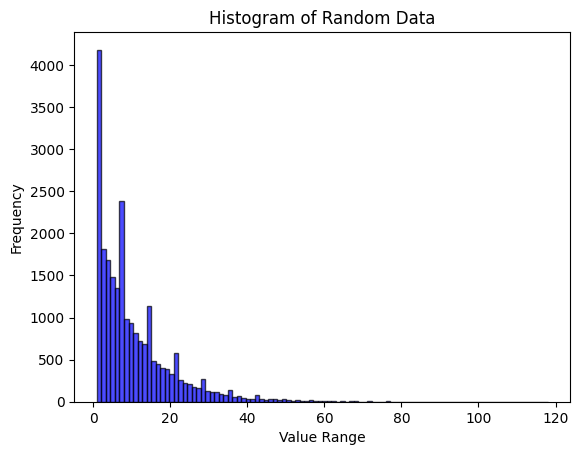

In [ ]:
import matplotlib.pyplot as plt
plt.hist(data, bins=100, color='blue', alpha=0.7, edgecolor='black')

plt.title("Histogram of Random Data")
plt.xlabel("Value Range")
plt.ylabel("Frequency")

plt.show()

In [ ]:
# matrix = np.random.poisson(
#     lam = np.random.randint(
#       low=0,
#       high=82251,
#       size=(23368, 5)
#     ),
#     size=(23368, 5)
# )
matrix = np.random.poisson(
    lam = data.reshape(-1,1),
    size=(23368, 5)
)
count = pd.DataFrame(matrix, index=[f'gene_{i}' for i in range(1, 23369)], columns=[f'sample_{i}' for i in range(1, 6)])
count

,sample_1,sample_2,sample_3,sample_4,sample_5
gene_1,2,0,3,1,1
gene_2,24,27,23,20,20
gene_3,23,21,20,33,26
gene_4,5,9,5,9,3
gene_5,5,8,4,3,3
...,...,...,...,...,...
gene_23364,10,4,4,8,4
gene_23365,1,1,1,4,1
gene_23366,12,8,8,9,8
gene_23367,12,10,12,12,8


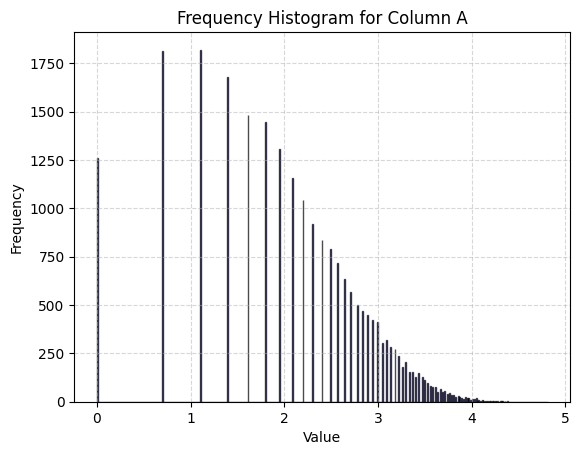

In [ ]:
import matplotlib.pyplot as plt
np.log1p(count['sample_1']).plot.hist(bins=500, alpha=0.7, color='blue', edgecolor='black', title='Frequency Histogram for Column A')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(alpha=0.5, linestyle='--')
plt.show()

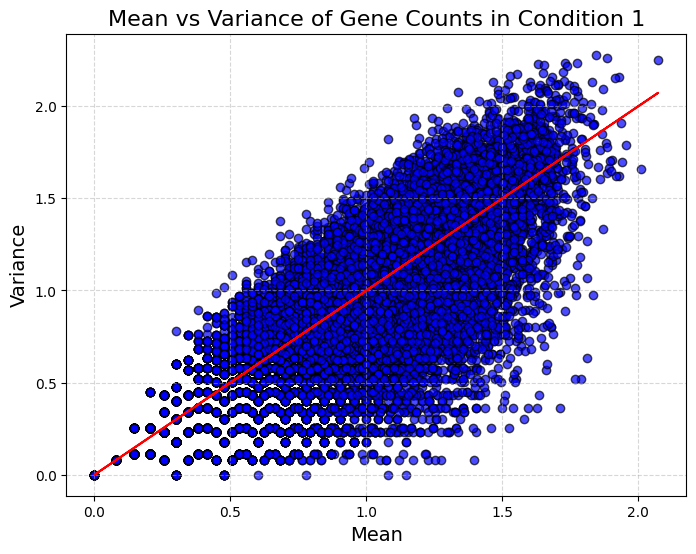

In [ ]:
df = count
#  计算均值和方差
means = np.log10(df.mean(axis=1)+1)
variances = np.log10(df.var(axis=1)+1)
means
#  绘制散点图
plt.figure(figsize=(8, 6))
plt.scatter(means, variances, color='blue', alpha=0.7, edgecolor='k')
plt.plot(means, means, color="red", label="mean_counts line")


plt.title('Mean vs Variance of Gene Counts in Condition 1', fontsize=16)
plt.xlabel('Mean', fontsize=14)
plt.ylabel('Variance', fontsize=14)
plt.grid(alpha=0.5, linestyle='--')
plt.show()


In [ ]:

list = [5,4,6]
print(list)
print(np.var(list))
list = [5*10,4*2,6*3]
print(list)
print(np.var(list))
# list = [5+10,4+10,6+10]
# print(list)
# print(np.var(list))

[5, 4, 6]
0.6666666666666666
[50, 8, 18]
320.88888888888886


In [ ]:
np.random.seed(2025)
noise = np.random.randint(
      low=1,
      high=10,
      size=count.shape
    )
change_count = count * noise

In [ ]:
noise

array([[3, 9, 4, 4, 1],
       [7, 9, 6, 2, 9],
       [6, 8, 6, 5, 1],
       ...,
       [2, 5, 7, 4, 3],
       [2, 4, 4, 4, 3],
       [9, 5, 5, 6, 5]])

In [ ]:
count

,sample_1,sample_2,sample_3,sample_4,sample_5
gene_1,2,0,3,1,1
gene_2,24,27,23,20,20
gene_3,23,21,20,33,26
gene_4,5,9,5,9,3
gene_5,5,8,4,3,3
...,...,...,...,...,...
gene_23364,10,4,4,8,4
gene_23365,1,1,1,4,1
gene_23366,12,8,8,9,8
gene_23367,12,10,12,12,8


In [ ]:
change_count

,sample_1,sample_2,sample_3,sample_4,sample_5
gene_1,6,0,12,4,1
gene_2,168,243,138,40,180
gene_3,138,168,120,165,26
gene_4,5,54,20,45,6
gene_5,5,64,4,6,12
...,...,...,...,...,...
gene_23364,10,4,16,16,28
gene_23365,6,6,9,32,8
gene_23366,24,40,56,36,24
gene_23367,24,40,48,48,24


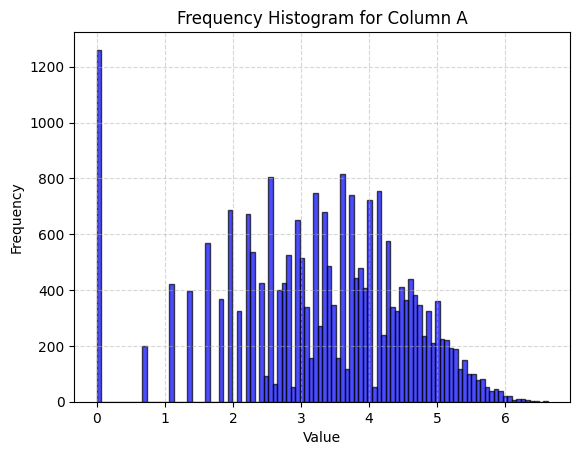

In [ ]:
import matplotlib.pyplot as plt
np.log1p(change_count['sample_1']).plot.hist(bins=100, alpha=0.7, color='blue', edgecolor='black', title='Frequency Histogram for Column A')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(alpha=0.5, linestyle='--')
plt.show()

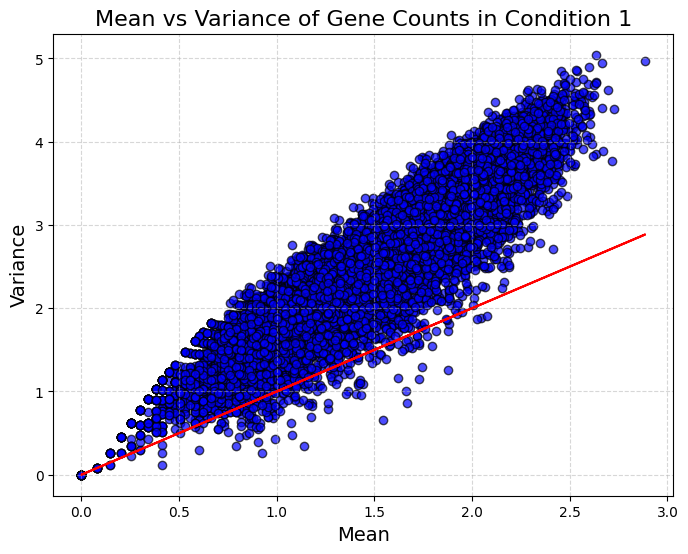

In [ ]:
df = change_count
#  计算均值和方差
means = np.log10(df.mean(axis=1)+1)
variances_change = np.log10(df.var(axis=1)+1)
means
#  绘制散点图
plt.figure(figsize=(8, 6))
plt.scatter(means, variances_change, color='blue', alpha=0.7, edgecolor='k')
plt.plot(means, means, color="red", label="mean_counts line")


plt.title('Mean vs Variance of Gene Counts in Condition 1', fontsize=16)
plt.xlabel('Mean', fontsize=14)
plt.ylabel('Variance', fontsize=14)
plt.grid(alpha=0.5, linestyle='--')
plt.show()
